# Iris

#### Name: 沈家駿
#### Student ID: 0712223

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

%matplotlib inline

## Data Input

In [2]:
data = pd.read_csv("iris.data",header=None)
# data.head()

In [3]:
# data.loc[75]

In [4]:
# print(data.loc[data[4]=='Iris-versicolour'])
#data[4]=='Iris-setosa'

## Data Visualization

Feature: sepal length
    All
	average: 5.843333333333334
	standard deviation: 0.828066127977863
    Iris-setosa
	average: 5.006
	standard deviation: 0.35248968721345136
    Iris-versicolor
	average: 5.936
	standard deviation: 0.5161711470638634
    Iris-virginica
	average: 6.587999999999998
	standard deviation: 0.6358795932744322
--------------------------------------------
Feature: sepal width
    All
	average: 3.0540000000000003
	standard deviation: 0.4335943113621737
    Iris-setosa
	average: 3.418
	standard deviation: 0.38102439795469095
    Iris-versicolor
	average: 2.7700000000000005
	standard deviation: 0.3137983233784114
    Iris-virginica
	average: 2.974
	standard deviation: 0.32249663817263746
--------------------------------------------
Feature: petal length
    All
	average: 3.758666666666666
	standard deviation: 1.7644204199522626
    Iris-setosa
	average: 1.464
	standard deviation: 0.17351115943644546
    Iris-versicolor
	average: 4.26
	standard deviation: 0.469910977239

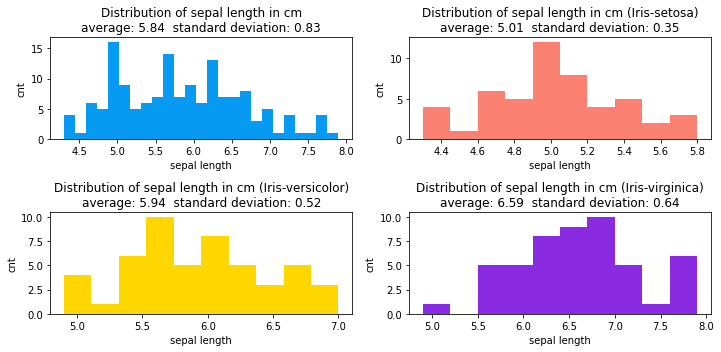

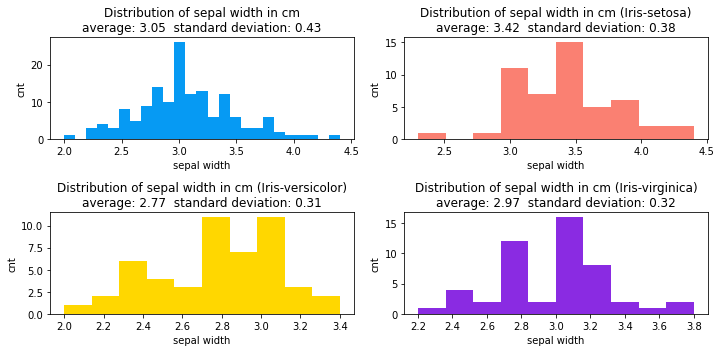

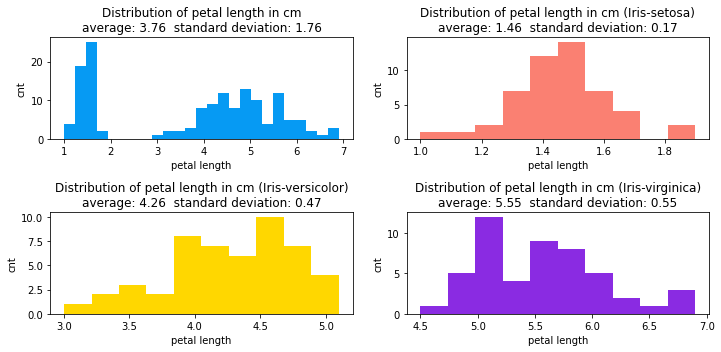

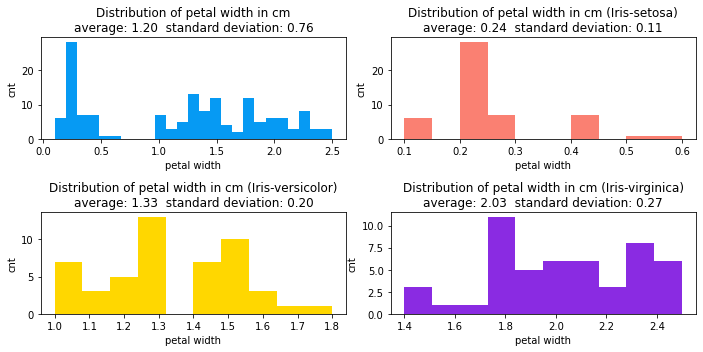

In [5]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

def visulization(axs, seq, x, title, featureName, binSz, colorName):
    print('\taverage:',x.mean())
    print('\tstandard deviation:',x.std())
    xMean = '{:.2f}'.format(x.mean())
    xStd = '{:.2f}'.format(x.std())

    subplt = axs[seq//2,seq%2]
    subplt.hist(x, bins = binSz, color=colorName)
    subplt.set_title(title+'\naverage: '+xMean+'  standard deviation: '+xStd)
    subplt.set_xlabel(featureName)
    subplt.set_ylabel("cnt")
    
for i in range(4):
    print('Feature:', features[i])
    fig, axs = plt.subplots(2, 2, figsize=(10,5))
    
    print('    All')
    visulization(axs, 0,data[i], 'Distribution of '+features[i]+' in cm', features[i], 25, '#069AF3')
    
    print('    Iris-setosa')
    visulization(axs, 1, data.loc[data[4]=='Iris-setosa'][i], 'Distribution of '+features[i]+' in cm (Iris-setosa)', features[i], 10, 'salmon')

    print('    Iris-versicolor')
    visulization(axs, 2, data.loc[data[4]=='Iris-versicolor'][i], 'Distribution of '+features[i]+' in cm (Iris-versicolor)', features[i], 10, 'gold')
    
    print('    Iris-virginica')
    visulization(axs, 3, data.loc[data[4]=='Iris-virginica'][i], 'Distribution of '+features[i]+' in cm (Iris-virginica)', features[i], 10, 'blueviolet')
    
    fig.tight_layout()
    print('--------------------------------------------')
    


## Data Preprocessing 
Divide the data into X(features) and y(labels) and transform data format.

In [6]:
X = data.drop(columns=[4]).to_numpy()

lableEncodingDict = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
y = np.array([lableEncodingDict[className] for className in data[4]])

## Model Construction
Construct a Gaussian Naive Bayes model.

In [7]:
gnb = GaussianNB()

## Train-Test-Split

### Holdout validation

In [8]:
X_train_Holdout, X_test_Holdout, y_train_Holdout, y_test_Holdout = train_test_split(X, y, test_size=0.3)
y_pred_Holdout = gnb.fit(X_train_Holdout, y_train_Holdout).predict(X_test_Holdout)

### K-fold cross-validation

In [9]:
kf = KFold(n_splits=3, shuffle = True)
confusionMatrixKfoldSum = np.zeros([3,3])
accuracyKfoldSum = 0
precisionKfoldSum = np.zeros([3])
recallKfoldSum = np.zeros([3])

for train_index, test_index in kf.split(X):
    X_train_Kfold, X_test_Kfold = X[train_index], X[test_index]
    y_train_Kfold, y_test_Kfold = y[train_index], y[test_index]
    gnb = GaussianNB()
 
    gnb.fit(X_train_Kfold, y_train_Kfold)
    y_pred_Kfold = gnb.predict(X_test_Kfold)
    
    conf_matrix = sklearn.metrics.confusion_matrix(y_test_Kfold, y_pred_Kfold).transpose()
    confusionMatrixKfoldSum += np.array(conf_matrix)
    
    accuracyKfoldSum += sklearn.metrics.accuracy_score(y_test_Kfold, y_pred_Kfold)
    
    precision_temp, recall_temp, _, _ = sklearn.metrics.precision_recall_fscore_support(y_test_Kfold, y_pred_Kfold)
    precisionKfoldSum += np.array(precision_temp)
    recallKfoldSum += np.array(recall_temp)
    
#     print('cm', sklearn.metrics.confusion_matrix(y_test_Kfold, y_pred_Kfold).transpose())
#     print('acc',sklearn.metrics.accuracy_score(y_test_Kfold, y_pred_Kfold))
#     print('precision',precision_temp)
#     print('recall',recall_temp)
#     print('___________________________')


In [10]:
cm_Kfold = confusionMatrixKfoldSum/3
acc_Kfold = accuracyKfoldSum/3
pc_Kfold = precisionKfoldSum/3
recall_Kfold = recallKfoldSum/3

## Results

### Generate the row indices and column names of Confusion matrices

In [11]:
rowInds = list(map(lambda x: 'Predicted '+x, list(lableEncodingDict)))
colNames = list(map(lambda x: 'Actual '+x, list(lableEncodingDict)))

### Show the confusion matices

In [12]:
cmHoldout = sklearn.metrics.confusion_matrix(y_test_Holdout, y_pred_Holdout).transpose()

print('Confusion matrix of Holdout validation')
display(pd.DataFrame(cmHoldout, index=rowInds, columns=colNames))

print('Confusion matrix of K-fold cross-validation')
display(pd.DataFrame(cm_Kfold, index=rowInds, columns=colNames))

Confusion matrix of Holdout validation


,Actual Iris-setosa,Actual Iris-versicolor,Actual Iris-virginica
Predicted Iris-setosa,14,0,0
Predicted Iris-versicolor,0,14,1
Predicted Iris-virginica,0,0,16


Confusion matrix of K-fold cross-validation


,Actual Iris-setosa,Actual Iris-versicolor,Actual Iris-virginica
Predicted Iris-setosa,16.666667,0.000000,0.000000
Predicted Iris-versicolor,0.000000,15.333333,1.333333
Predicted Iris-virginica,0.000000,1.333333,15.333333


### Show the accuracies

In [13]:
accuracyHoldout = sklearn.metrics.accuracy_score(y_test_Holdout, y_pred_Holdout)
display(pd.DataFrame(np.array([[accuracyHoldout,acc_Kfold]]), index=['Accuracy'], columns=['Holdout validation','K-fold cross-validation']))

,Holdout validation,K-fold cross-validation
Accuracy,0.977778,0.946667


### Show the sensitivities(recalls) and precisions

In [14]:
precisionHoldout, recallHoldout, _, _ = sklearn.metrics.precision_recall_fscore_support(y_test_Holdout, y_pred_Holdout)

print('Precision')
display(pd.DataFrame(np.array([precisionHoldout,pc_Kfold]), index=['Holdout','K-fold'], columns=list(lableEncodingDict)))

print('Sensitivity(Recall)')
display(pd.DataFrame(np.array([recallHoldout,recall_Kfold]), index=['Holdout','K-fold'], columns=list(lableEncodingDict)))

Precision


,Iris-setosa,Iris-versicolor,Iris-virginica
Holdout,1.0,0.933333,1.000000
K-fold,1.0,0.917367,0.920343


Sensitivity(Recall)


,Iris-setosa,Iris-versicolor,Iris-virginica
Holdout,1.0,1.000000,0.941176
K-fold,1.0,0.932323,0.925926


## Comparison & Conclusion
在此作業用了兩種方式做validation，假如多跑幾次會發現，holdout的數值變動較大，而k-fold則較穩定。

## Questions

### 1. What are the values of 𝜇 and 𝜎 of assumed 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour)?
𝜇 = 4.26<br>
𝜎 = 0.46991097723995806

In [15]:
target_data = data[data[4]=='Iris-versicolor'][2]
mu = target_data.mean()
sigma = target_data.std()

print('mean:',mu)
print('stdv:',sigma)

mean: 4.26
stdv: 0.46991097723995795


### 2. Use a graph to show the probability density function of assumed 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour) 

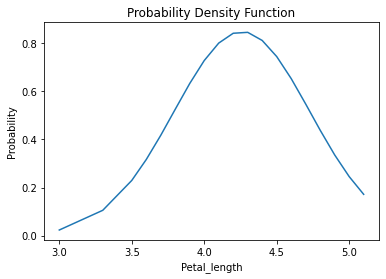

In [16]:
import scipy.stats as stats
a= list(target_data)
a.sort()
pdf = stats.norm.pdf(a, mu, sigma)
plt.title('Probability Density Function')
plt.xlabel('Petal_length')
plt.ylabel('Probability')
plt.plot(a, pdf) 